In [262]:
import pandas as  pd
import numpy as  np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from scipy import stats


# Импортируем библиотеки
# Подключаем датасет

In [263]:
db = pd.read_csv('diabetes.csv')
db 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Переведём данные в нужный формат удалим пустые значения

In [264]:
OEnc = OrdinalEncoder()
db[['gender', 'age', 'smoking_history', 'bmi' , 'HbA1c_level']] = OEnc.fit_transform(db[['gender', 'age', 'smoking_history', 'bmi' , 'HbA1c_level']])

db['gender'] = db['gender'].fillna(db['gender'].mode()[0])
db['smoking_history'] = db['smoking_history'].fillna(db['smoking_history'].mode()[0])

db[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = db[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].fillna(db.mean())
db

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,101.0,0,1,4.0,1334.0,11.0,140,0
1,0.0,75.0,0,0,0.0,1547.0,11.0,80,0
2,1.0,49.0,0,0,4.0,1547.0,5.0,158,0
3,0.0,57.0,0,0,1.0,1160.0,4.0,155,0
4,1.0,97.0,1,1,1.0,829.0,3.0,155,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,101.0,0,0,0.0,1547.0,9.0,90,0
99996,0.0,23.0,0,0,0.0,552.0,10.0,100,0
99997,1.0,87.0,0,0,3.0,1598.0,5.0,155,0
99998,0.0,45.0,0,0,4.0,2357.0,1.0,100,0


### Промасштабируем данные

In [265]:
scaler = StandardScaler()
db[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(db[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']])
db

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,1.668875,0,1,4.0,-0.323722,1.317953,0.047704,0
1,0.0,0.536791,0,0,0.0,0.005974,1.317953,-1.426210,0
2,1.0,-0.595293,0,0,4.0,0.005974,-0.258436,0.489878,0
3,0.0,-0.246959,0,0,1.0,-0.593052,-0.521167,0.416183,0
4,1.0,1.494708,1,1,1.0,-1.105396,-0.783899,0.416183,0
...,...,...,...,...,...,...,...,...,...
99995,0.0,1.668875,0,0,0.0,0.005974,0.792490,-1.180558,0
99996,0.0,-1.727377,0,0,0.0,-1.534156,1.055222,-0.934905,0
99997,1.0,1.059291,0,0,3.0,0.084915,-0.258436,0.416183,0
99998,0.0,-0.769460,0,0,4.0,1.259748,-1.309362,-0.934905,0


### Теперь следует Удальть выбросы

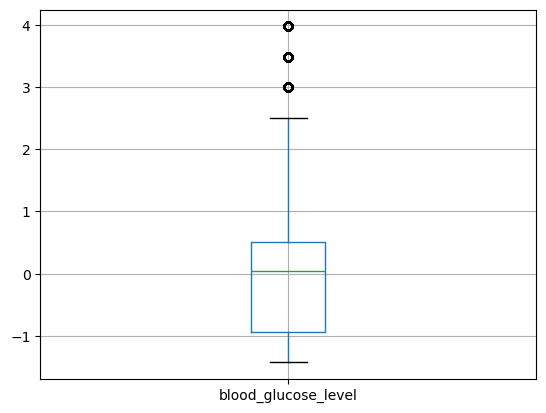

In [266]:
import matplotlib.pyplot as plt

db.boxplot(column='blood_glucose_level')
plt.show()

In [267]:
z_scores = np.abs(stats.zscore(db[[ 'bmi', 'blood_glucose_level']]))
db = db[(z_scores < 3).all(axis=1)]

In [ ]:
    
Y = db["diabetes"]
X = db.drop("diabetes", axis = 1)

### Разбить данные по KFold; На 5 частей, данные не будут перемешанны.

In [269]:
kf = KFold(n_splits=4, shuffle=False, random_state=None)


In [270]:
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import seaborn as sns

In [271]:
dtc = RandomForestRegressor()


### Проводим обучение и выводи метрики

In [272]:
for train_index, test_index in kf.split(db):
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index]
    # обучение
    dtc.fit(X_train, Y_train)#, X_train, Y_train
    # прогнозирование
    Y_pred = dtc.predict(X_test)#predict X_test
    print(round(metrics.max_error(Y_test,Y_pred) * 100,2))
    print(round(metrics.mean_absolute_error(Y_test,Y_pred) * 100,2))
    print(round(metrics.mean_squared_error(Y_test,Y_pred) * 100,2))
    print(round(metrics.r2_score(Y_test,Y_pred) * 100,2))
    print(round(metrics.mean_squared_error(Y_test,Y_pred) * 100,2))

    print('-'*20)

IndexError: positional indexers are out-of-bounds